In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

import warnings

# Disable all warnings
warnings.filterwarnings('ignore')

In [2]:
#read the csv file and parse the date column
data = pd.read_csv(r'C:\Users\raksh\OneDrive\Desktop\Sem 4\Econometrics and Time series\Project\Walmart_Store_sales.csv')


In [3]:
import pandas as pd
from datetime import datetime

# Assuming your data is in a DataFrame named 'data'
def convert_date(date_str):
    try:
        return datetime.strptime(date_str, '%m/%d/%Y')
    except ValueError:
        return datetime.strptime(date_str, '%d-%m-%Y')

data['Date'] = data['Date'].apply(convert_date)

In [4]:
#splitting the date into day, month and year
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [54]:
#create a new dataframe with only the date and weekly sales columns for store 20 as it has maximum sales
store20 = data[data['Store'] == 20]
store20 = store20[['Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
store20 = store20.set_index('Date')

<AxesSubplot:xlabel='Date'>

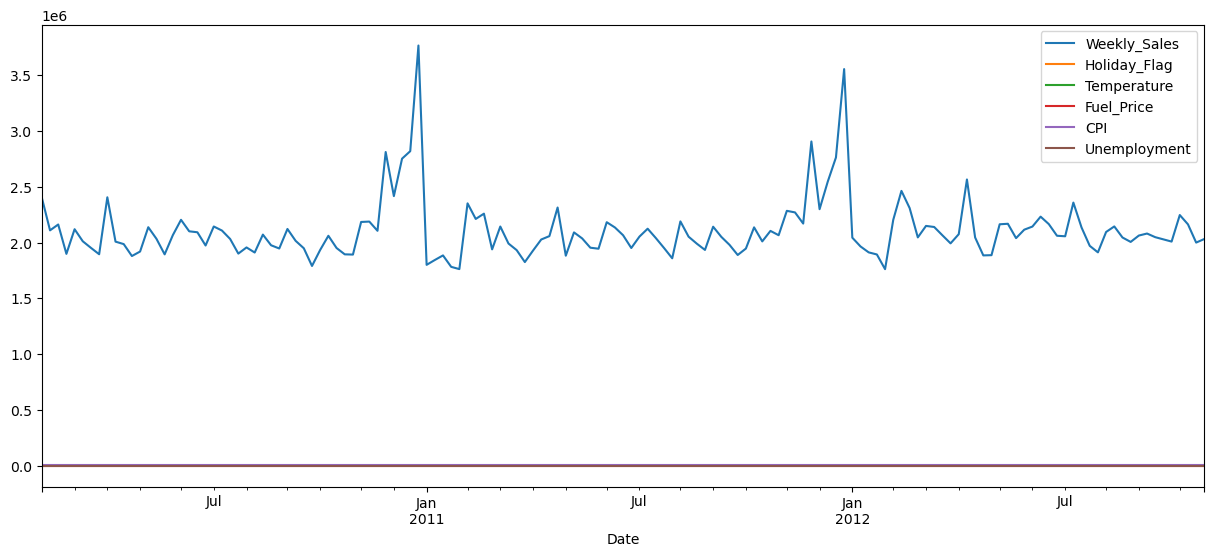

In [55]:
#resampling the data on weekly basis
store20_weekly = store20.resample('W').sum()

#plotting the weekly sales
store20_weekly.plot(figsize=(15, 6))

In [57]:
print(type(store20_weekly))
print(store20_weekly.head())

<class 'pandas.core.frame.DataFrame'>
            Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
Date                                                                          
2010-02-07    2401395.47             0        25.92       2.784  204.247194   
2010-02-14    2109107.90             1        22.12       2.773  204.385747   
2010-02-21    2161549.76             0        25.43       2.745  204.432100   
2010-02-28    1898193.95             0        32.32       2.754  204.463087   
2010-03-07    2119213.72             0        31.75       2.777  204.494073   

            Unemployment  
Date                      
2010-02-07         8.187  
2010-02-14         8.187  
2010-02-21         8.187  
2010-02-28         8.187  
2010-03-07         8.187  


In [58]:
store20_weekly

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,
2010-02-07,2401395.47,0,25.92,2.784,204.247194,8.187
2010-02-14,2109107.90,1,22.12,2.773,204.385747,8.187
2010-02-21,2161549.76,0,25.43,2.745,204.432100,8.187
2010-02-28,1898193.95,0,32.32,2.754,204.463087,8.187
2010-03-07,2119213.72,0,31.75,2.777,204.494073,8.187
...,...,...,...,...,...,...
2012-09-30,2008350.58,0,58.65,3.997,215.736716,7.280
2012-10-07,2246411.89,0,60.77,3.985,215.925886,7.293
2012-10-14,2162951.36,0,47.20,4.000,216.115057,7.293


In [59]:
# Define exogenous variables
exog_variables = store20_weekly[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
exog_variables

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,
2010-02-07,0,25.92,2.784,204.247194,8.187
2010-02-14,1,22.12,2.773,204.385747,8.187
2010-02-21,0,25.43,2.745,204.432100,8.187
2010-02-28,0,32.32,2.754,204.463087,8.187
2010-03-07,0,31.75,2.777,204.494073,8.187
...,...,...,...,...,...
2012-09-30,0,58.65,3.997,215.736716,7.280
2012-10-07,0,60.77,3.985,215.925886,7.293
2012-10-14,0,47.20,4.000,216.115057,7.293


In [60]:
#stationarity test
import statsmodels.api as sm

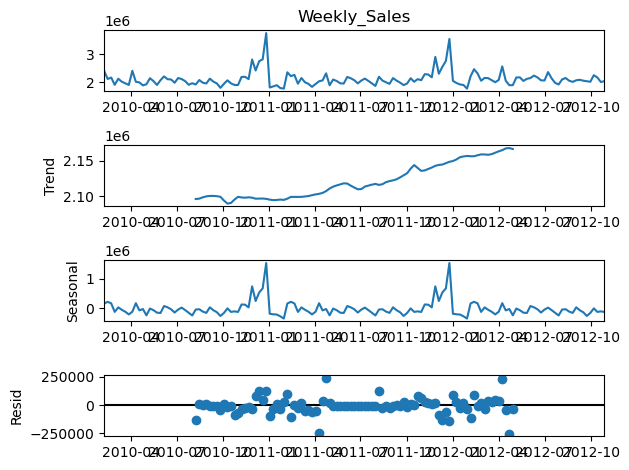

In [61]:
# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(store20_weekly['Weekly_Sales'], model='additive')

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

In [62]:
#adf test
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

adf_test(store20_weekly['Weekly_Sales'])


Results of Augmented Dickey-Fuller Test:
Test Statistic                  -5.393739
p-value                          0.000003
#Lags Used                       4.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


In [63]:
# Fit ARIMA model
# Change the order parameters (p, d, q) based on your analysis of ACF and PACF plots
# Here, I'm assuming an ARIMA(1, 1, 1) model
model = ARIMA(store20_weekly['Weekly_Sales'], order=(1, 1, 1), exog=exog_variables)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1986.810
Date:                Tue, 30 Apr 2024   AIC                           3989.619
Time:                        22:38:59   BIC                           4013.266
Sample:                    02-07-2010   HQIC                          3999.228
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Holiday_Flag -5.283e+04   4.92e+04     -1.073      0.283   -1.49e+05    4.37e+04
Temperature  -1870.0898   5051.241     -0.370      0.711   -1.18e+04    8030.161
Fuel_Price   -4.701e+05   4.93e+05     -0.95

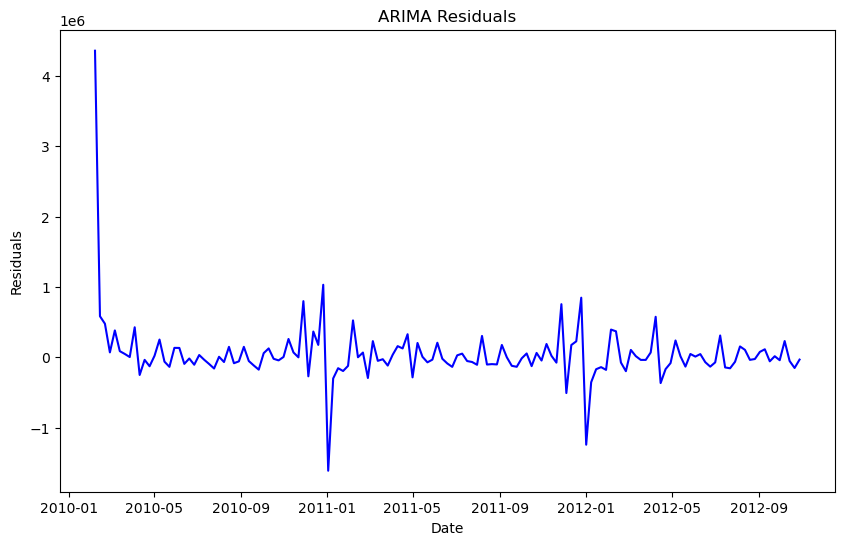

In [64]:
# Plot residual errors
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, color='blue')
plt.title('ARIMA Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

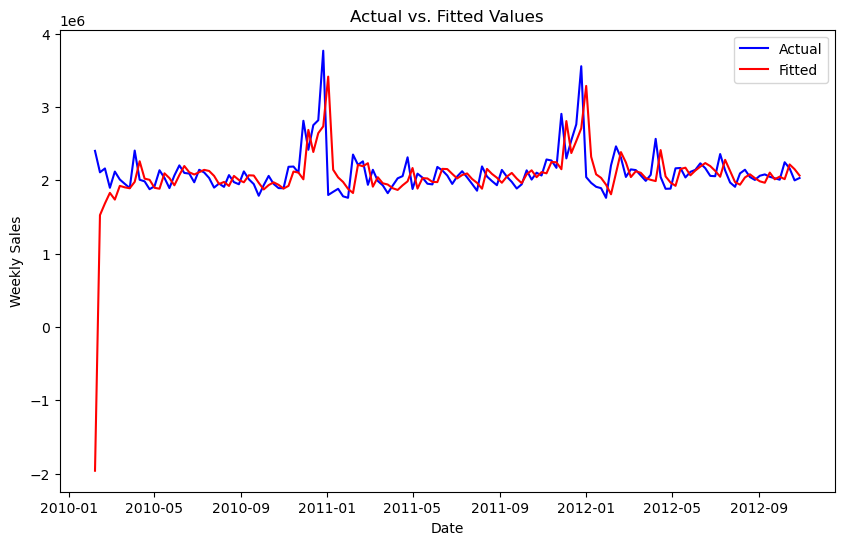

In [65]:
# Plot actual vs. fitted values
plt.figure(figsize=(10, 6))
plt.plot(store20_weekly.index, store20_weekly['Weekly_Sales'], label='Actual', color='blue')
plt.plot(store20_weekly.index, model_fit.fittedvalues, label='Fitted', color='red')
plt.legend()
plt.title('Actual vs. Fitted Values')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()


In [66]:
# Calculate errors using fitted values
mae = np.mean(np.abs(store20_weekly['Weekly_Sales'] - model_fit.fittedvalues))
mse = np.mean((store20_weekly['Weekly_Sales'] - model_fit.fittedvalues) ** 2)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 204087.66942957466
Mean Squared Error (MSE): 215320601759.06723
Root Mean Squared Error (RMSE): 464026.50975894387


In [67]:
# Coefficients:
# Holiday_Flag: The coefficient is approximately -5.283e+04, but it is not statistically significant at conventional levels
#(p-value > 0.05).
# Temperature, Fuel_Price, CPI, Unemployment: These coefficients represent the impact of each variable on the Weekly_Sales.
#None of them are statistically significant at conventional levels.

# ARIMA Parameters:
# ar.L1: Autoregressive parameter for lag 1 is approximately 0.4293, indicating a moderate positive autocorrelation.
# ma.L1: Moving average parameter for lag 1 is approximately -0.6626, indicating a negative effect of 
#the lagged forecast errors on the current observation.

# Residual Diagnostics:
# Ljung-Box (L1) (Q): The p-value associated with the Ljung-Box test statistic (4.64) is below 0.05, 
#indicating significant autocorrelation in the residuals at lag 1.
# Jarque-Bera (JB): The JB statistic (590.43) and its associated p-value (0.00) 
#indicate that the residuals do not follow a normal distribution.
# Heteroskedasticity (H): The p-value associated with the test statistic (0.14) 
#indicates that there is no evidence of heteroskedasticity in the residuals at conventional levels.


In [68]:
# Overall, the model may not be adequately capturing the underlying patterns in the data, 
#as indicated by the insignificant coefficients and the diagnostic test results. 
#Further refinement of the model or exploration of alternative modeling approaches may be necessary.

In [69]:
#OLS

In [41]:
store20_weekly

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
Date,,,,,,,,,,
2010-02-07,20,2401395.47,0,25.92,2.784,204.247194,8.187,5,2,2010
2010-02-14,20,2109107.90,1,22.12,2.773,204.385747,8.187,12,2,2010
2010-02-21,20,2161549.76,0,25.43,2.745,204.432100,8.187,19,2,2010
2010-02-28,20,1898193.95,0,32.32,2.754,204.463087,8.187,26,2,2010
2010-03-07,20,2119213.72,0,31.75,2.777,204.494073,8.187,5,3,2010
...,...,...,...,...,...,...,...,...,...,...
2012-09-30,20,2008350.58,0,58.65,3.997,215.736716,7.280,28,9,2012
2012-10-07,20,2246411.89,0,60.77,3.985,215.925886,7.293,5,10,2012
2012-10-14,20,2162951.36,0,47.20,4.000,216.115057,7.293,12,10,2012


In [46]:
import statsmodels.api as sm

# Step 2: Specify the Regression Model
X = store20_weekly[['CPI', 'Unemployment', 'Holiday_Flag', 'Fuel_Price', 'Temperature','Fuel_Price', 'day']]  # Independent variables
y = store20_weekly['Weekly_Sales']  # Dependent variable

# Add constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Step 3: Fit the Regression Model
model = sm.OLS(y, X)
results = model.fit()

# Step 4: Assess Model Fit
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     3.634
Date:                Tue, 30 Apr 2024   Prob (F-statistic):            0.00224
Time:                        21:55:49   Log-Likelihood:                -1983.2
No. Observations:                 143   AIC:                             3980.
Df Residuals:                     136   BIC:                             4001.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.118e+06   2.33e+06      0.480   

In [ ]:
#Time-series with Trend

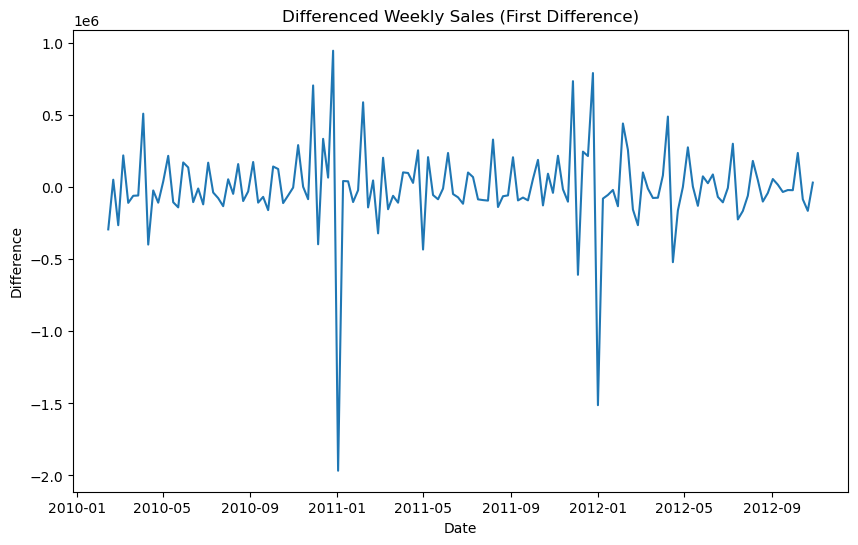

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  142
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1975.853
Date:                Tue, 30 Apr 2024   AIC                           3957.706
Time:                        22:01:57   BIC                           3966.552
Sample:                    02-14-2010   HQIC                          3961.301
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3649      0.055     -6.641      0.000      -0.473      -0.257
ma.L1         -0.9945      0.064    -15.563      0.000      -1.120      -0.869
sigma2      1.071e+11   4.75e-13   2.26e+23      0.0

In [47]:
# store20_weekly is time series data

# Take first difference to remove trend
store20_weekly_diff = store20_weekly['Weekly_Sales'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(store20_weekly_diff)
plt.title('Differenced Weekly Sales (First Difference)')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

# Fit ARIMA model to the differenced series
# Assuming an ARIMA(1, 1, 1) model
model = ARIMA(store20_weekly_diff, order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

In [ ]:
#SARIMAX model

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1986.810
Date:                Tue, 30 Apr 2024   AIC                           3989.619
Time:                        22:09:59   BIC                           4013.266
Sample:                    02-07-2010   HQIC                          3999.228
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
CPI           9941.7108   1.68e+04      0.593      0.553   -2.29e+04    4.28e+04
Unemployment -3.215e+05   4.19e+05     -0.768      0.443   -1.14e+06    4.99e+05
Holiday_Flag -5.283e+04   4.92e+04     -1.07

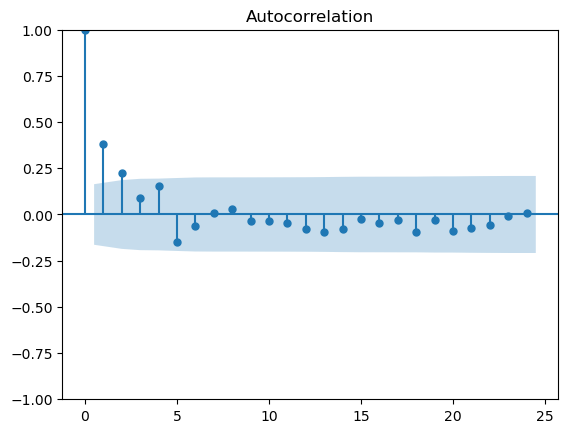

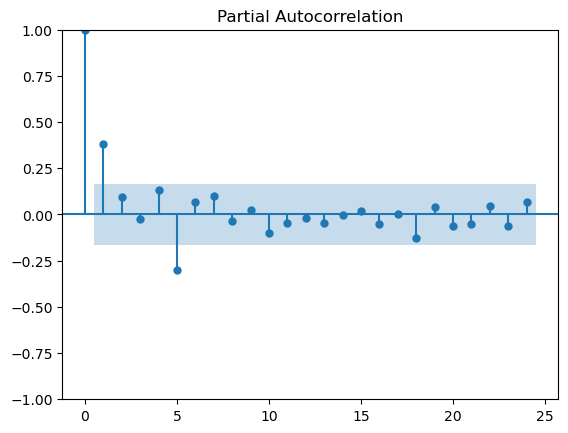

In [48]:
import statsmodels.api as sm

# Step 1: Plot ACF and PACF
sm.graphics.tsa.plot_acf(store20_weekly['Weekly_Sales'], lags=24)
sm.graphics.tsa.plot_pacf(store20_weekly['Weekly_Sales'], lags=24)

# Step 2: Choose order parameters (p, d, q)
# Based on the ACF and PACF plots, identify the values of p and q where the autocorrelation drops to insignificance.
# The parameter d (integration order) can be determined based on the differencing required to make the series stationary.

# Step 3: Fit SARIMAX model
model = sm.tsa.SARIMAX(store20_weekly['Weekly_Sales'], order=(p, d, q), exog=store20_weekly[['CPI', 'Unemployment', 'Holiday_Flag', 'Fuel_Price', 'Temperature']])
results = model.fit()

# Step 4: Print model summary
print(results.summary())

In [ ]:
#AR model

Root Mean Squared Error (RMSE): 129538.17694866711


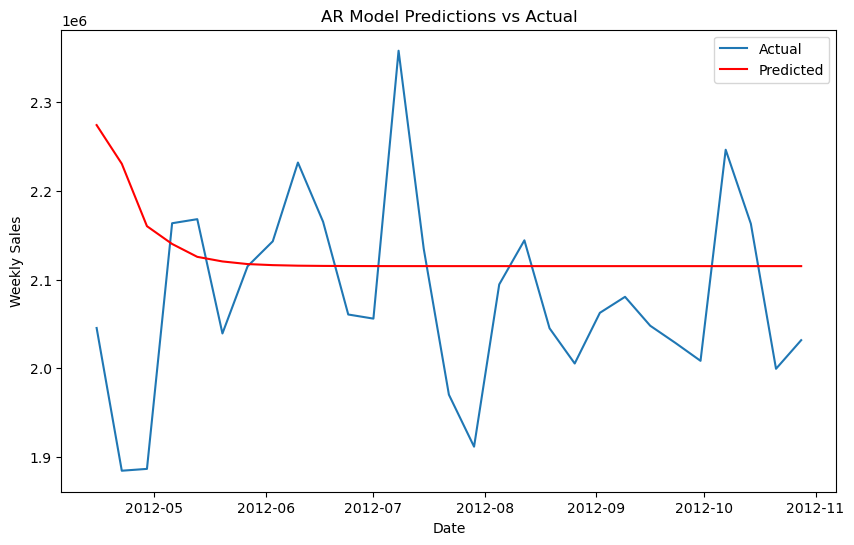

In [53]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
train_size = int(len(store20_weekly) * 0.8)
train_data, test_data = store20_weekly[:train_size], store20_weekly[train_size:]

# Define the lag order based on the identified pattern in the PACF plot
lag_order = 3  # Adjust this value based on your analysis

# Fit the autoregressive model
model = AutoReg(train_data['Weekly_Sales'], lags=lag_order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Evaluate the predictions
mse = mean_squared_error(test_data['Weekly_Sales'], predictions)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Weekly_Sales'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('AR Model Predictions vs Actual')
plt.legend()
plt.show()